In [ ]:
a_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
a_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

회귀
  - Regression : 변수간의 관계를 모델링하고 예측, 주로 연속형 변수를 예측

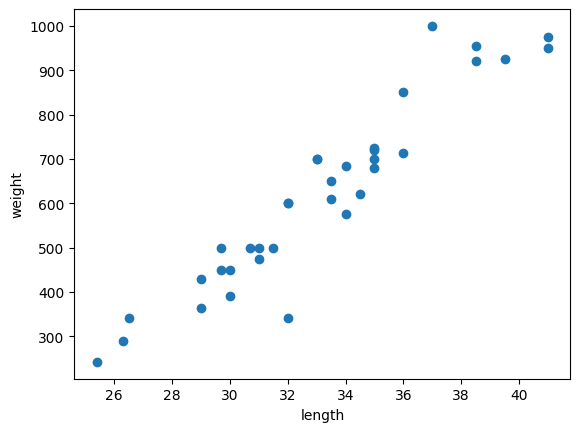

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(a_length,a_weight)
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

In [ ]:
b_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
b_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

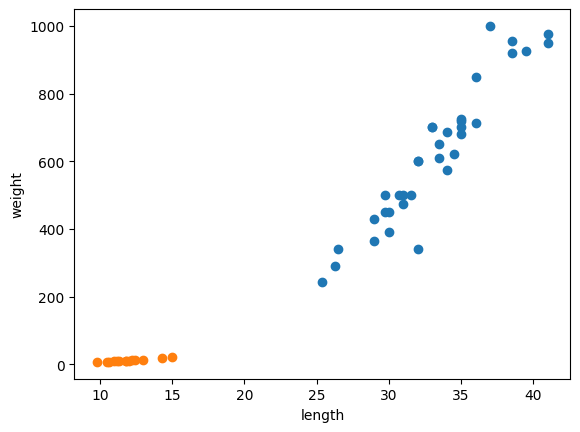

In [ ]:
plt.scatter(a_length,a_weight)
plt.scatter(b_length,b_weight)
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

- 예측 : Regression
  - 미래의 값을 예측
- 분류 : Classifier
  - 종류 : 딸기,사과,배

사이킷런 : 머신러닝을 위한 라이브러리

In [ ]:
# 데이터를 병합
length = a_length + b_length
weight = a_weight + b_weight

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(data = {
    "length":length,
    "weight":weight
})
df.head()

,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


In [ ]:
df['target'] = len(a_length) * [1] + len(b_length)*[0]

In [ ]:
df.tail()

,length,weight,target
44,12.2,12.2,0
45,12.4,13.4,0
46,13.0,12.2,0
47,14.3,19.7,0
48,15.0,19.9,0


KNeighborsClassfier : k-최근접이웃 알고리즘기반으로 분류모델, 지도학습
  - 이웃의 개수(K) : 이웃의 개수로 다수결에 의해서 분류
  - 거리측정 : 유클리드거리 알고리즘 사용(일반적으로)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 1. 모델 객체 생성
kn = KNeighborsClassifier()
# 2. 모델객체를 통해 학습
train = df.iloc[:,:-1]
target = df.iloc[:,-1]

kn.fit(train,target)

KNeighborsClassifier()

In [ ]:
#.3 평가 (정확성 Accuracy  1.0  0.89)
kn.score(train,target)

1.0

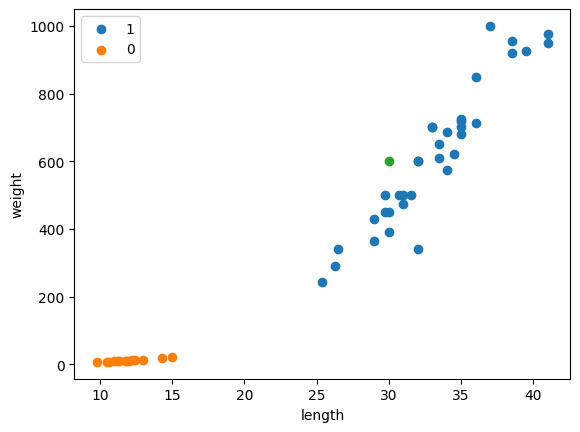

In [ ]:
plt.scatter(a_length,a_weight,label='1')
plt.scatter(b_length,b_weight,label='0')
plt.scatter(30,600)
plt.xlabel("length")
plt.ylabel('weight')
plt.legend()
plt.show()

In [ ]:
# 4.예측 - 학습한 형태대로 데이터를 넣어줘야 한다.
sample = pd.DataFrame(data = {
    "length":[30],
    "weight":[600]
})
kn.predict(sample)

array([1])

In [ ]:
all_kn = KNeighborsClassifier(n_neighbors=len(df))
all_kn.fit(train,target)
all_kn.score(train,target)

0.7142857142857143

In [ ]:
len(a_length) / len(df)

0.7142857142857143

In [ ]:
# 매개변수인 n_neighbors의 값을 확인해서 score의 성능이 1에 미치지 못할때는 언제인지
# 1부터 시작해서 ~~~ 조사
for n in range(1,50):
  kn = KNeighborsClassifier(n_neighbors=n)
  kn.fit(train,target)
  score =  kn.score(train,target)
  if score < 1:
    print(n, score)
    break

18 0.9795918367346939


- 문제점
  - 전체데이터를 가지고 학습을 했기때문에
  - 평가를 할 데이터가 없다.. 여거서 평가는 학습하지 않는 데이터를 가지고 해야 함
- 해결점
  - 확보한데이터를 학습용과 검증용으로 분리해서
  - 학습용 데이터로 학습을 하고 검증용 데이터로 평가를 한다.  
  

In [ ]:
length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
target = [1]*35 + [0]*14

In [ ]:
df = pd.DataFrame(data = {
    "length":length,
    'weight':weight,
    'target':target
})
df.head()


,length,weight,target
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1


In [ ]:
# train 데이터는 전체데이터에서 처음부터 35개만 추출하고
# 나머지는 test  데이터로 만든다
train = df.iloc[:35]
test = df.iloc[35:]

In [ ]:
# 1.모델선택
kn = KNeighborsClassifier()
# 2.학습
kn.fit(train.iloc[:,:-1], train.iloc[:,-1])

KNeighborsClassifier()

In [ ]:
# 3.평가
kn.score(test.iloc[:,:-1], test.iloc[:,-1])

0.0

지금까지의 문제점
  1. 전체데이터를 학습하고 전체데이터를 평가하면 당연히 100점
  2. 1번을 해결하기 위해서 학습용 데이터와 검증용 데이터를 분리하는데
  이때 분리한 데이터가 라벨 1에 대한 데이터만 분리해서 학습하면
  학습하지 않은 라벨 0에대한 평가는 0점이다.
  3. 학습용 데이터에는 우리가 알고자하는 모든 라벨의 데이터가 잘 섞여야 한다

In [ ]:
import numpy as np
temp = [1,2,3,4,5]
print(temp)
np.random.shuffle(temp)
print(temp)

[1, 2, 3, 4, 5]
[4, 1, 3, 2, 5]


In [ ]:
df2 = df.sample(n=len(df))
df2.head()

,length,weight,target
41,11.8,10.0,0
3,29.0,363.0,1
37,10.6,7.0,0
17,33.0,700.0,1
9,30.7,500.0,1


In [ ]:
# 7:3의 비율로 데이터 분리해서
# 학습하고
# 평가하고

In [ ]:
split_num = round(len(df2)*0.7)
train = df2.iloc[:split_num]
test =  df2.iloc[split_num:]

In [ ]:
kn = KNeighborsClassifier()
kn.fit(train.iloc[:,:-1], train.iloc[:,-1])
kn.score(test.iloc[:,:-1], test.iloc[:,-1])

1.0

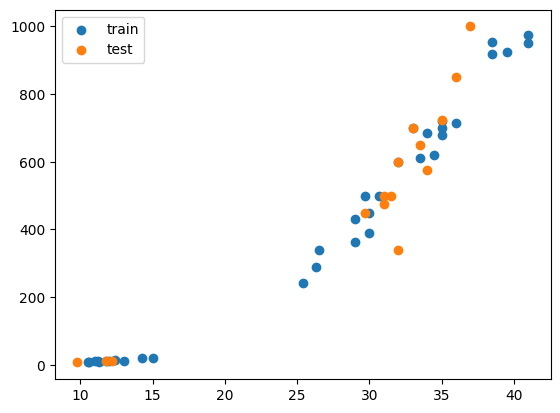

In [ ]:
plt.scatter(train.loc[:,'length'],train.loc[:,'weight'],label='train')
plt.scatter(test.loc[:,'length'],test.loc[:,'weight'],label='test')
plt.legend()
plt.show()

적절한 비율로 데이터를 섞어서 학습용과 검증용 데이터 확보
  - 사이킷런을 이용

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# x(학습용),y(저답)
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [ ]:
# 모델 생성
kn = KNeighborsClassifier()
# 학습
kn.fit(X_train,y_train)
# 평가
kn.score(X_test,y_test)

1.0

seaborn 에있는 타이타닉 데이터로 생존여부 예측하기

In [ ]:
# 1. 데이터 확보하기
# 2. 학습용와 검증용 분리하기
# 3. 적절한 모델 선택하기
# 4. 평가하기

In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.loc[:,:'sex']
titanic.head()

,survived,pclass,sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


In [ ]:
# 범주형데이터 ->  one hot encoding
titanic = pd.get_dummies(titanic)
titanic

,survived,pclass,sex_female,sex_male
0,0,3,0,1
1,1,1,1,0
2,1,3,1,0
3,1,1,1,0
4,0,3,0,1
...,...,...,...,...
886,0,2,0,1
887,1,1,1,0
888,0,3,1,0
889,1,1,0,1


In [ ]:
X = titanic.iloc[:,1:]
y = titanic.iloc[:,0]

In [ ]:
X_train,X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# 모델선택
# 학습
# 평가

In [ ]:
kn=KNeighborsClassifier()
kn.fit(X_train,y_train)
kn.score(X_test, y_test)

0.7574626865671642

iris 데이터를 가지고 품종 예측 모델

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# X, y 분리
# y는 품종데이터 - 문자->숫자  one hot encoding 안함 --> 정답이기때문에  0 1 2로 변경
# 모델선택
# 학습용 검증용 분리
# 학습
# 평가
# 임의의 데이터만들어서 어떤품종 예측 predict

In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris['target'] = iris['species'].map({
    'setosa':0,'versicolor':1,'virginica':2
})

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [ ]:
X = iris[['sepal_length',	'sepal_width']]
y = iris['target']

In [ ]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train,y_train)
kn.score(X_test,y_test)

0.7777777777777778

In [ ]:
# 새로운데이터로 예측
print(kn.predict(X_test), y_test.values)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 1 1 1 2 0 1 0 2 2 1 1 2 0 0 0 0 2 0 0 2 2
 0 0 0 1 2 2 0 0] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [ ]:
data = {
    'sepal_length':[7.5],
    'sepal_width':[2.7]
}
predict = kn.predict(pd.DataFrame(data))
result = ['setosa','versicolor','virginica']
result[predict[0]]


'virginica'

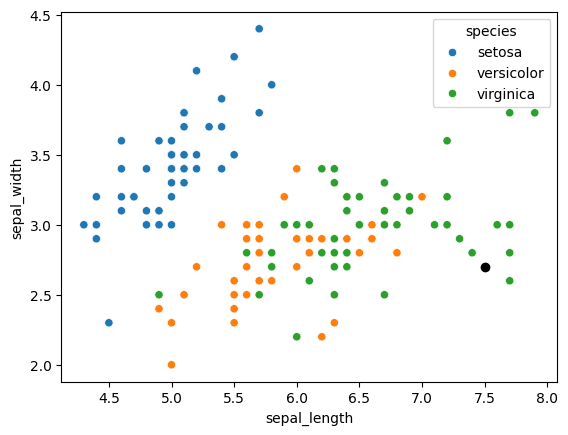

In [ ]:
sns.scatterplot(data=iris, x='sepal_length',y='sepal_width',hue='species')
plt.scatter(x = 7.5, y=2.7,c='black')